import matplotlib.pyplot as plt
import os
# ^^^ pyforest auto-imports - don't write above this line
# 8 Modules differentiation

## Negative control: Genetic Modules in plant infected not present in plant healthy 

**Datatype are text files with the ID of the genes**

Made by: Cynthia Soto <br>
Date: June 18th, 2021 <br>
Last md: August 12th 2021 <br>

**Assumptions:** <br>
Exist at least 2 folders < control & infected > containing genetic modules (files) with the genes identiers. <br>

1. Parse each infected module against all the control modules <br>
2. Get de arithmetic difference.  <br> 
3. Calculate the percentual representation of the infected module in the control one.  <br>
4. Plot some stats to explaint the work done.  <br>

In [1]:
import os
# ^^^ pyforest auto-imports - don't write above this line
#from pyforest import *  # import the 40 most popular libraries to your notebook
# to see the available libraries 
# lazy_imports()

# Set some initial configuration 
import pandas as pd
pd.set_option("display.precision", 2)

In [2]:
os.getcwd()

'/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/notebooks'

In [3]:
# Set the base directory
try:
    # Change the current working Directory      
    os.chdir("../results-data/wgcna")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")        

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna


### Folders with modules identify in wgcna

In [4]:
# Check the available folders with genetic modules
import glob
## check a bit of the files to be processed ... are they ok?
s_path = str(os.getcwd()+'/Athal*') 
all_files = glob.glob(s_path)
for file in all_files:
    print(file)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_selected_clusters.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_merged_MatrixE
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_healthy_mods_merged_MatrixD
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_healthy_mods_MatrixD
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_healthy_selected_clusters.csv
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_MatrixE


### Function declaration

In [5]:
def load_ctl_mod_to_compare(s_mod_name):
    # Create a set of the module in control required
    # IN:     @ s_mod_name: name of the file containing the gene list
    # OUT:    @ set_gene_ctrl: a set containing the unique genes to be compared 
    mod = '../Athal_healthy_mods_merged_MatrixD/'+ s_mod_name
    df1 = pd.read_csv(mod, header=None)    ## nrows=100, usecols=[0,1]
    gene_inf_lst = df1[0].tolist()
    set_gene_ctrl = set(gene_inf_lst)
    #print(set_gene_ctrl)
    return set_gene_ctrl

In [6]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [7]:
def make_autopct2(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

### Modules comparitions

#### Check the number of modules in the infected dataset to be compared 

In [8]:
os.chdir("Athal_infected_mods_merged_MatrixE")
dirListing_inf = os.listdir(str(os.getcwd()))
print("Number of modules in infected dataset:" + str(len(dirListing_inf)))
path_files = os.getcwd()
print(path_files)
dirListing_inf[0:5]

Number of modules in infected dataset:35
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_merged_MatrixE


['mod_merged_tomato2.txt',
 'mod_merged_chocolate.txt',
 'mod_merged_indianred.txt',
 'mod_merged_bisque4.txt',
 'mod_merged_blue2.txt']

#### Create a list with the module's names (control)  to be parsed in recursive mode 
Option 1: parse a specific directory to create the list of genetic modules (MGs) <br>
Option 2: parse a file with preselected MG to create the list of genetic modules (MGs) <br>

In [10]:
# Option 1: This chunck create a list of (all) healthy modules parsing a specific whole directory 

# os.chdir("../Athal_healthy_mods_merged_MatrixD")
# print("Directory changed:", os.getcwd() )
# # First check the number of modules to compare 
# dirListing_ctl = os.listdir(str(os.getcwd()))
# i_mods_to_parse = len(dirListing_ctl)
# print("Number of modules in ctrl:" + str(i_mods_to_parse))

# # Second check the name of the modules
# s_path = str(os.getcwd()+'/*') 
# path_files_ctrl = glob.glob(s_path)
# #print("Path file control:", path_files_ctrl)

# #Create the lst of the modules in recursive mode
# lst_mods_ctrl=[]
# for file in path_files_ctrl:
#     #print(os.path.basename(file))
#     lst_mods_ctrl.append(os.path.basename(file))
# print(lst_mods_ctrl[0:5])
# i_mods_to_parse = len(lst_mods_ctrl)

In [14]:
# Option 2: This chunck create a list of healthy preselected modules 
# This option takes into account that the genetic module's comparitions be made just over relevant healthy mods
# read csv file
df=pd.read_csv("../Athal_healthy_selected_clusters.csv", sep=',', header=0, usecols=[1])
df
#Create the lst of the modules in recursive mod
df["mergedColors"] = 'mod_merged_' + df['mergedColors'] + '.txt'
lst_mods_ctrl = df["mergedColors"].to_list()
print(lst_mods_ctrl[0:4])
i_mods_to_parse = len(lst_mods_ctrl)
print(i_mods_to_parse)
#os.chdir("../Athal_healthy_mods_merged_MatrixD")

['mod_merged_coral3.txt', 'mod_merged_mistyrose3.txt', 'mod_merged_tan1.txt', 'mod_merged_orange1.txt']
21


### Parse each infected module across all the the control modules stored in the lst_mods_ctrl variable
#### A dictionary is built to save the result's comparitions for further analysis

In [15]:
print(os.getcwd())

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/wgcna/Athal_infected_mods_merged_MatrixE


In [17]:
#### 
my_dict={}
x = 1
y = 1 # for assing unique keys to the dict

# os.chdir("../Athal_infected_mods_merged_MatrixE")
# print(os.getcwd())
for file in dirListing_inf:    # files is each infected module
    #print(file)
    # Prepare first set to be compared
    df1 = pd.read_csv(file, header=None)    ## nrows=100, usecols=[0,1]
    gene_list = df1[0].tolist()
    # Get a unique set of genes from the specific infected module
    uniqueGenes_inf = set(gene_list)
    #print(uniqueGenes_inf)
    mod_inf_name = str(os.path.basename(file))
    mod_inf_name_lng = len(uniqueGenes_inf)
    print("Infected Mod compare " + str(x) + ": " + mod_inf_name + ' have ' + str(mod_inf_name_lng) + ' unique genes')
   
    ##################################
    # Compare the specific infected mod against all the healthy preselected mods to the percentual diference
    # Go to the folder <<control>> because is the one to be parsed 
    os.chdir("../Athal_healthy_mods_merged_MatrixD")
    for i in range (i_mods_to_parse):  #i_mods_to_parse
        mod_name = lst_mods_ctrl[i]
        #print("Ctrl mod: ", mod_name)
        #call the function that load the healthy mod to be compared
        uniqueGenes_ctr = load_ctl_mod_to_compare(mod_name)
        dif_AB = len(uniqueGenes_inf - uniqueGenes_ctr) 
        # Make the module logic comparition
        if mod_inf_name_lng == dif_AB:
            PercDif_AB = 100
        else :
            PercDif_AB = (100 * dif_AB) / mod_inf_name_lng
        # mod_inf_name, mod_inf_name_lng, 
        mod_ctl_name_lng = len(uniqueGenes_ctr)
        #print(mod_name, '\t', mod_ctl_name_lng,'\t',dif_AB,'\t', PercDif_AB)
        # Insert the result of the comparition into a dicitonary for further analysis
        #print(y)
        my_dict[y] = {}
        my_dict[y]['Mod_Inf'] = mod_inf_name.rsplit( ".", 1 )[ 0 ] 
        my_dict[y]['Mod_Lng_Inf'] = mod_inf_name_lng
        my_dict[y]['Mod_Ctl'] = mod_name.rsplit(".",1)[0]
        my_dict[y]['Mod_Lng_Ctl'] = mod_ctl_name_lng
        my_dict[y]['Genes_diff'] = dif_AB
        my_dict[y]['Perc_diff']= PercDif_AB
        y = y+1
    ################################## 
    
    # Now change the directory bacause of another module of infected is going to be read
    os.chdir("../Athal_infected_mods_merged_MatrixE")
    x = x + 1    # to escape in the first infected mod
    #if x > 3: break
#print(my_dict)              
print("done")

Infected Mod compare 1: mod_merged_tomato2.txt have 218 unique genes
Infected Mod compare 2: mod_merged_chocolate.txt have 818 unique genes
Infected Mod compare 3: mod_merged_indianred.txt have 160 unique genes
Infected Mod compare 4: mod_merged_bisque4.txt have 115 unique genes
Infected Mod compare 5: mod_merged_blue2.txt have 416 unique genes
Infected Mod compare 6: mod_merged_firebrick2.txt have 304 unique genes
Infected Mod compare 7: mod_merged_deepskyblue.txt have 39 unique genes
Infected Mod compare 8: mod_merged_dodgerblue1.txt have 72 unique genes
Infected Mod compare 9: mod_merged_green.txt have 236 unique genes
Infected Mod compare 10: mod_merged_tan3.txt have 189 unique genes
Infected Mod compare 11: mod_merged_lightblue2.txt have 196 unique genes
Infected Mod compare 12: mod_merged_lavender.txt have 99 unique genes
Infected Mod compare 13: mod_merged_coral4.txt have 98 unique genes
Infected Mod compare 14: mod_merged_skyblue4.txt have 309 unique genes
Infected Mod compare 

In [20]:
my_dict[1]
#my_dict[1]['Perc_diff']

{'Mod_Inf': 'mod_merged_tomato2',
 'Mod_Lng_Inf': 218,
 'Mod_Ctl': 'mod_merged_coral3',
 'Mod_Lng_Ctl': 2024,
 'Genes_diff': 180,
 'Perc_diff': 82.56880733944953}

In [21]:
#import pandas as pd
   
# Creates padas DataFrame by parsing 
# Lists of dictionaries and row index.
df = pd.DataFrame(my_dict, index =['Mod_Inf','Mod_Lng_Inf','Mod_Ctl','Mod_Lng_Ctl','Genes_diff','Perc_diff'])
# Print the data
df

,1,2,3,4,5,6,7,8,9,10,...,726,727,728,729,730,731,732,733,734,735
Mod_Inf,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,mod_merged_tomato2,...,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace,mod_merged_oldlace
Mod_Lng_Inf,218,218,218,218,218,218,218,218,218,218,...,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087
Mod_Ctl,mod_merged_coral3,mod_merged_mistyrose3,mod_merged_tan1,mod_merged_orange1,mod_merged_deepskyblue,mod_merged_darkolivegreen4,mod_merged_thistle1,mod_merged_magenta2,mod_merged_lightblue1,mod_merged_darkolivegreen2,...,mod_merged_antiquewhite,mod_merged_navajowhite3,mod_merged_mediumpurple1,mod_merged_coral1,mod_merged_mediumpurple3,mod_merged_navajowhite1,mod_merged_blue3,mod_merged_brown3,mod_merged_antiquewhite3,mod_merged_firebrick2
Mod_Lng_Ctl,2024,33,33,95,834,1792,273,204,195,1175,...,577,492,273,141,109,87,79,39,764,210
Genes_diff,180,217,218,214,214,215,218,218,215,181,...,1013,1060,1087,1084,1085,1086,1086,1085,1084,1076
Perc_diff,83,1e+02,100,98,98,99,100,100,99,83,...,93,98,100,1e+02,1e+02,1e+02,1e+02,1e+02,1e+02,99


In [25]:
len(df.columns)

735

In [26]:
df_comp = df.T
df_comp.head(3)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
1,mod_merged_tomato2,218,mod_merged_coral3,2024,180,83
2,mod_merged_tomato2,218,mod_merged_mistyrose3,33,217,1e+02
3,mod_merged_tomato2,218,mod_merged_tan1,33,218,100


In [27]:
df_comp.to_csv("../modules_merged_comparition.csv", sep=",", header=True)
df_plt = df_comp
df_plt.head(2)

,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
1,mod_merged_tomato2,218,mod_merged_coral3,2024,180,83
2,mod_merged_tomato2,218,mod_merged_mistyrose3,33,217,1e+02


In [31]:
# Filter cases where infected mods are different in >80%
print(len(df_plt))
df_plt = df_plt[df_plt['Perc_diff'] >= 80]
print(len(df_plt))
my_xticks = list(range(79,101,1))
my_xticks[-5:]

720
720


[96, 97, 98, 99, 100]

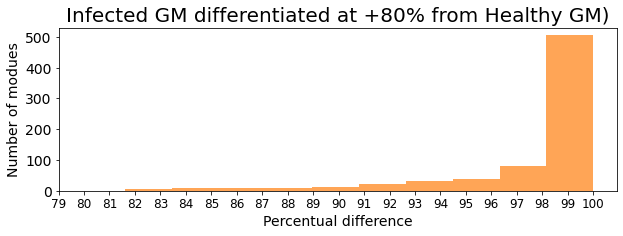

In [32]:
import matplotlib.pyplot as plt
df_plt[["Perc_diff"]] = df_plt[["Perc_diff"]].apply(pd.to_numeric)
#df_plt.hist(by='Mod_Inf',column='Perc_diff')
df_plt.hist(figsize=(10,3), grid=False,  color="C1", alpha=0.7)     #alpha (transparency in color); rwidth=0.9 to set space btw bars
plt.title("Infected GM differentiated at +80% from Healthy GM)",fontsize=20);
plt.xlabel('Percentual difference',fontsize=14);
plt.ylabel('Number of modues',fontsize=14);
plt.xticks(my_xticks, fontsize=12);
plt.yticks(fontsize=14);

In [33]:
# Filter cases where infected mods are different in 100%
df_comp = df_comp[df_comp['Perc_diff'] == 100]
print(str(len(df_comp)))
df_comp.head(5)
#df_comp.to_csv("../modules_merged_comparition100.csv", sep=",", header=True)

237


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
3,mod_merged_tomato2,218,mod_merged_tan1,33,218,100
7,mod_merged_tomato2,218,mod_merged_thistle1,273,218,100
8,mod_merged_tomato2,218,mod_merged_magenta2,204,218,100
13,mod_merged_tomato2,218,mod_merged_navajowhite3,492,218,100
15,mod_merged_tomato2,218,mod_merged_coral1,141,218,100


In [34]:
# ## selecting rows based on 100% difference 
# df_diff100 = df_comp   #[df_comp['Perc_diff'] == 100]
# ## df_plt = df_diff100.head(n=30)
# df_plt = df_diff100.sample(frac=0.25)

# Get a fraction to plot
df_plt = df_comp.sample(frac=0.25)
print(str(len(df_plt)))
df_plt.head(5)

59


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
617,mod_merged_green3,472,mod_merged_magenta2,204,472,100
203,mod_merged_tan3,189,mod_merged_mediumpurple1,273,189,100
612,mod_merged_green3,472,mod_merged_tan1,33,472,100
382,mod_merged_cornsilk2,267,mod_merged_orange1,95,267,100
100,mod_merged_blue2,416,mod_merged_mediumpurple3,109,416,100


In [36]:
num_mods = (len(df_plt))

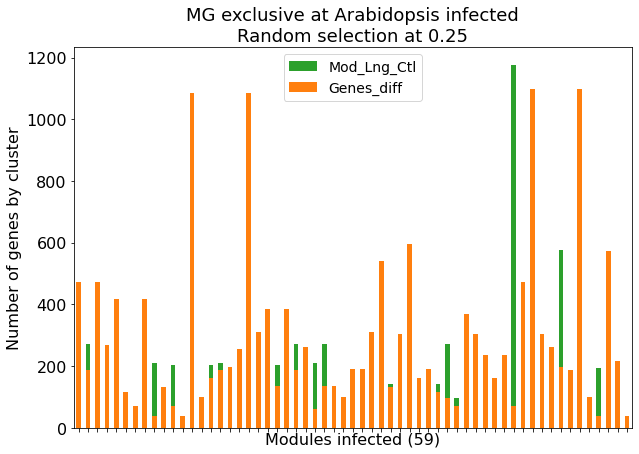

In [38]:
ax = df_plt.plot(x="Mod_Inf", y="Mod_Lng_Ctl", kind="bar", figsize=(10,7), color="C2")
#df_plt.plot(x="Mod_Inf", y="Mod_Lng_Inf", kind="bar", ax=ax, color="C2")
df_plt.plot(x="Mod_Inf", y="Genes_diff", kind="bar", ax=ax, color="C1")
#df.plot(x="Mod_Inf", y="25%", kind="bar", ax=ax, color="C4")
plt.title("MG exclusive at Arabidopsis infected\nRandom selection at 0.25",fontsize=18);
plt.xlabel('Modules infected ('+ str(num_mods) +')',fontsize=16);
#plt.xticks(rotation=55,fontsize=14);
plt.xticks(visible=False)
plt.ylabel('Number of genes by cluster',fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=14);

#### Parse to keep unique modules 

In [39]:
df_unique_inf = df_comp.drop_duplicates(subset=["Mod_Inf"])
print(len(df_unique_inf))
print(df_unique_inf.head(5))
df_plot = df_unique_inf
df_plot.head(5)

34
                   Mod_Inf Mod_Lng_Inf                Mod_Ctl Mod_Lng_Ctl  \
3       mod_merged_tomato2         218        mod_merged_tan1          33   
44    mod_merged_indianred         160  mod_merged_mistyrose3          33   
65      mod_merged_bisque4         115  mod_merged_mistyrose3          33   
92        mod_merged_blue2         416    mod_merged_magenta2         204   
108  mod_merged_firebrick2         304        mod_merged_tan1          33   

    Genes_diff Perc_diff  
3          218       100  
44         160       100  
65         115       100  
92         416       100  
108        304       100  


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
3,mod_merged_tomato2,218,mod_merged_tan1,33,218,100
44,mod_merged_indianred,160,mod_merged_mistyrose3,33,160,100
65,mod_merged_bisque4,115,mod_merged_mistyrose3,33,115,100
92,mod_merged_blue2,416,mod_merged_magenta2,204,416,100
108,mod_merged_firebrick2,304,mod_merged_tan1,33,304,100


In [132]:
df_plot['Mod_Inf'] = df_plot['Mod_Inf'].str.lstrip('mod_merged_')
df_plot.head(5)
#df_unique_inf.plot(x="Mod_Inf", y="Mod_Lng_Ctl", kind="bar", figsize=(10,7), color="C2")

/home/cyntsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
6,tomato2,218,mod_merged_navajowhite3,492,218,100
53,indianred,160,mod_merged_mediumpurple1,273,160,100
76,bisque4,115,mod_merged_mediumpurple1,273,115,100
99,blue2,416,mod_merged_mediumpurple1,273,416,100
122,firebrick2,304,mod_merged_mediumpurple1,273,304,100


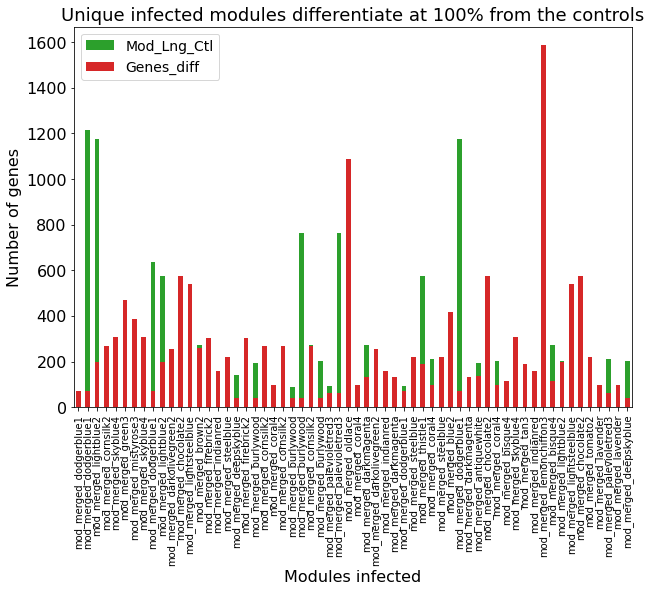

In [133]:
ax = df_plt.plot(x="Mod_Inf", y="Mod_Lng_Ctl", kind="bar", figsize=(10,7), color="C2")
#df_plt.plot(x="Mod_Inf", y="Mod_Lng_Inf", kind="bar", ax=ax, color="C1")
df_plt.plot(x="Mod_Inf", y="Genes_diff", kind="bar", ax=ax, color="C3")
#df.plot(x="Mod_Inf", y="25%", kind="bar", ax=ax, color="C4")
plt.title("Unique infected modules differentiate at 100% from the controls",fontsize=18);
plt.xlabel('Modules infected',fontsize=16);
plt.xticks(fontsize=10);
plt.xticks() #visible=False
plt.ylabel('Number of genes',fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=14);

In [20]:
#df_unique_inf

In [62]:
## Load the preselected modules with corr.values +/- 0.75
file = "../Athal_infected_selected_clusters.csv"
df_selected_mods = pd.read_csv(file, header=0, sep=",", usecols=[0,1,2])    ## nrows=100, usecols=[0,1]
print(len(df_selected_mods))

# # NON pre-selection of module 
# print(df_selected_mods.head(5))

# pre-selection of module < 300 genes 
df_selected_mods = df_selected_mods[df_selected_mods['Genes'] < 300]
print(len(df_selected_mods))
df_selected_mods

22
13


,color,Genes,mergedColors
3,Pos,99,lavender
4,Pos,72,dodgerblue1
5,Pos,189,mediumpurple1
7,PC,133,darkmagenta
10,Neg,218,tomato2
11,Neg,115,bisque4
12,Neg,39,deepskyblue
14,Neg,261,brown2
16,Antag,236,green
17,Antag,189,tan3


In [63]:
df_selected_mods['mergedColors'] ='mod_merged_' + df_selected_mods['mergedColors'].astype(str)
lst_inf_corr = df_selected_mods['mergedColors'].tolist()  
print(lst_inf_corr)
print(len(lst_inf_corr))
# lst_inf_corr = ['mod_merged_chocolate',
#  'mod_merged_chocolate2',
#  'mod_merged_green3',
#  'mod_merged_lavender',
#  'mod_merged_dodgerblue1',
#  'mod_merged_mediumpurple1',
#  'mod_merged_dodgerblue4',
#  'mod_merged_darkmagenta',
#  'mod_merged_palevioletred1',
#  'mod_merged_tomato2',
#  'mod_merged_bisque4',
#  'mod_merged_deepskyblue',
#  'mod_merged_blue2',
#  'mod_merged_brown2',
#  'mod_merged_darkolivegreen4',
#  'mod_merged_green',
#  'mod_merged_tan3',
#  'mod_merged_indianred',
#  'mod_merged_lightsteelblue',
#  'mod_merged_lightblue2',
#  'mod_merged_antiquewhite']

['mod_merged_lavender', 'mod_merged_dodgerblue1', 'mod_merged_mediumpurple1', 'mod_merged_darkmagenta', 'mod_merged_tomato2', 'mod_merged_bisque4', 'mod_merged_deepskyblue', 'mod_merged_brown2', 'mod_merged_green', 'mod_merged_tan3', 'mod_merged_indianred', 'mod_merged_lightblue2', 'mod_merged_antiquewhite']
13


In [64]:
## filter from unique df to get just the pre-selected modules < 300 genes
df_unique_inf2 = df_unique_inf[df_unique_inf['Mod_Inf'].isin(lst_inf_corr)]     
print(len(df_unique_inf2))
df_plot = df_unique_inf2
df_plot

13


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
6,mod_merged_tomato2,218,mod_merged_navajowhite3,492,218,100
53,mod_merged_indianred,160,mod_merged_mediumpurple1,273,160,100
76,mod_merged_bisque4,115,mod_merged_mediumpurple1,273,115,100
145,mod_merged_deepskyblue,39,mod_merged_mediumpurple1,273,39,100
162,mod_merged_dodgerblue1,72,mod_merged_firebrick3,1215,72,100
193,mod_merged_green,236,mod_merged_mediumpurple3,109,236,100
214,mod_merged_tan3,189,mod_merged_mediumpurple1,273,189,100
232,mod_merged_lightblue2,196,mod_merged_darkolivegreen2,1175,196,100
260,mod_merged_lavender,99,mod_merged_mediumpurple1,273,99,100
353,mod_merged_darkmagenta,133,mod_merged_coral1,141,133,100


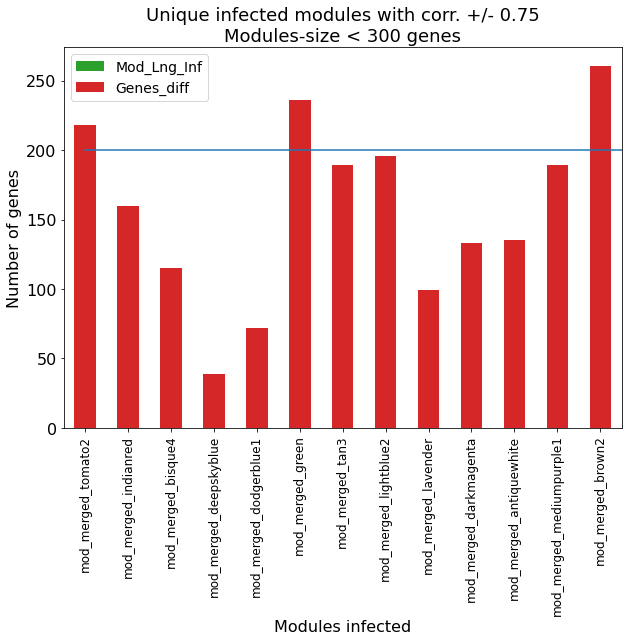

In [65]:
#ax = df_plt.plot(x="Mod_Inf", y="Mod_Lng_Ctl", kind="bar", figsize=(10,7), color="C2")
#df_plt.plot(x="Mod_Inf", y="Mod_Lng_Inf", kind="bar", ax=ax, color="C1")
ax = df_plot.plot(x="Mod_Inf", y="Mod_Lng_Inf", kind="bar", figsize=(10,7), color="C2")
df_plot.plot(x="Mod_Inf", y="Genes_diff", kind="bar", ax=ax, color="C3")

plt.title("Unique infected modules with corr. +/- 0.75\nModules-size < 300 genes",fontsize=18);
plt.xlabel('Modules infected',fontsize=16);
plt.xticks(fontsize=12);
plt.xticks() #visible=False
plt.ylabel('Number of genes',fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=14);
point1 = [0, 200]
point2 = [13, 200]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)


In [66]:
labels = df_plot["Mod_Inf"].to_list()
labels = ([s.replace('mod_merged_', '') for s in labels])
labels
quantity = df_plot["Genes_diff"].to_list()
quantity[0:4]

[218, 160, 115, 39]

No handles with labels found to put in legend.


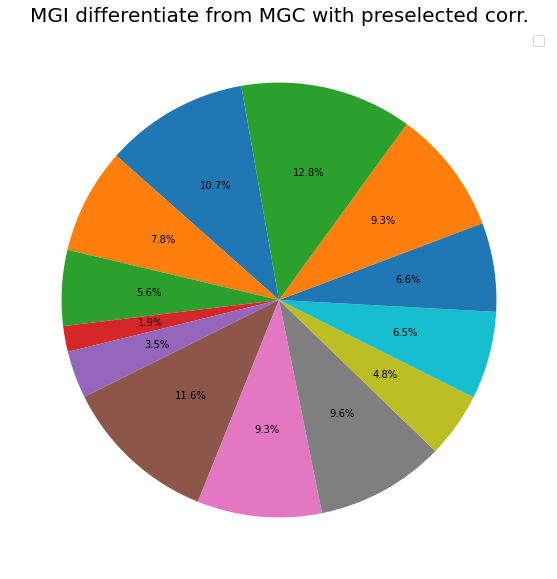

In [67]:
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.figure(figsize=(10,10))
plt.pie(quantity, autopct='%1.1f%%', shadow=False, startangle=100)   # labels=quantity
        # colors=colors, autopct='%1.1f%%'
#plt.legend(fontsize=12);
plt.title("MGI differentiate from MGC with preselected corr.",fontsize=20);
plt.legend(fontsize=14)
plt.show()


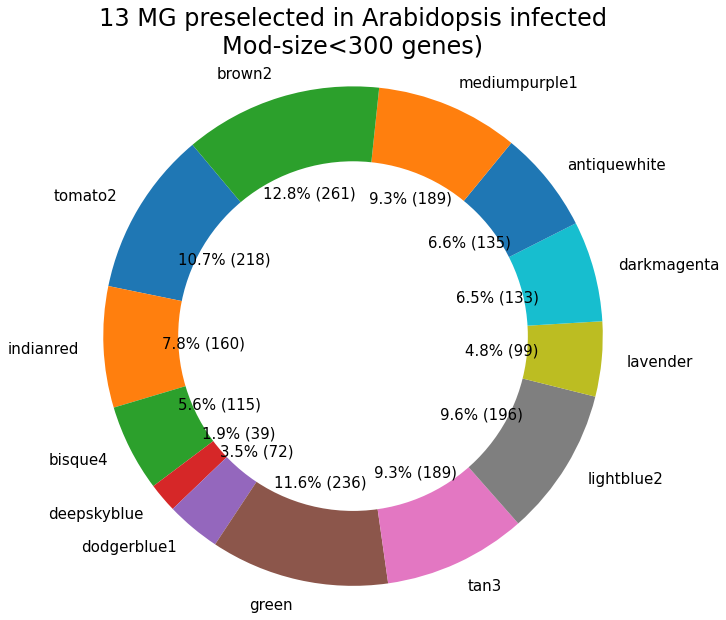

In [72]:
fig1, ax1 = plt.subplots(figsize=(10,8))

# Labels with percentual and float values
ax1.pie(quantity, labels=labels,autopct=make_autopct(quantity), 
         textprops={'fontsize': 15}, startangle=130)          

# Labels with only float values
# ax1.pie(quantity, labels=labels,autopct=make_autopct2(quantity), 
#          textprops={'fontsize': 18}, startangle=130)          

# Labels with only percentual values
# ax1.pie(quantity, labels=labels,autopct='%.1f%%', 
#        textprops={'fontsize': 17}, startangle=130)        

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("13 MG preselected in Arabidopsis infected\nMod-size<300 genes)", fontsize=24)
#plt.title("MG preselected in Arabidopsis infected(21)\nMod-size range [39-1098]", fontsize=24)
plt.show()

In [49]:
df_unique_ctl = df_unique_inf2.drop_duplicates(subset=["Mod_Ctl"])
print(len(df_unique_ctl))
df_plot2 = df_unique_ctl
df_plot2

8


,Mod_Inf,Mod_Lng_Inf,Mod_Ctl,Mod_Lng_Ctl,Genes_diff,Perc_diff
6,mod_merged_tomato2,218,mod_merged_navajowhite3,492,218,100
53,mod_merged_indianred,160,mod_merged_mediumpurple1,273,160,100
162,mod_merged_dodgerblue1,72,mod_merged_firebrick3,1215,72,100
193,mod_merged_green,236,mod_merged_mediumpurple3,109,236,100
232,mod_merged_lightblue2,196,mod_merged_darkolivegreen2,1175,196,100
353,mod_merged_darkmagenta,133,mod_merged_coral1,141,133,100
534,mod_merged_darkolivegreen4,597,mod_merged_antiquewhite,577,597,100
609,mod_merged_palevioletred1,368,mod_merged_blue3,79,368,100


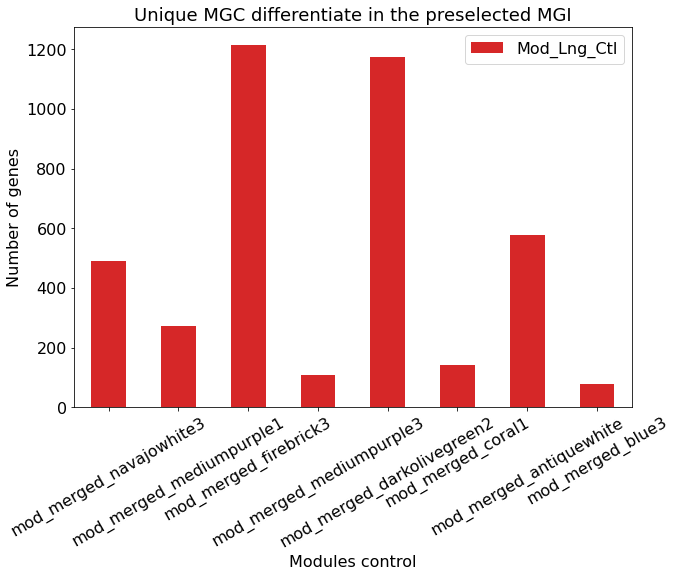

In [57]:
ax = df_plot2.plot(x="Mod_Ctl", y="Mod_Lng_Ctl", kind="bar", figsize=(10,7), color="C3")
#df_plt.plot(x="Mod_Ctl", y="Mod_Lng_Inf", kind="bar", ax=ax, color="C2")
#df_plt.plot(x="Mod_Ctl", y="Genes_diff", kind="bar", ax=ax, color="C1")
#df.plot(x="Mod_Inf", y="25%", kind="bar", ax=ax, color="C4")
plt.title("Unique MGC differentiate in the preselected MGI",fontsize=18);
plt.xlabel('Modules control',fontsize=16);
plt.xticks(rotation=30,fontsize=16);
plt.xticks()
plt.ylabel('Number of genes',fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=16);